In [1]:
import yfinance as yf

In [2]:
import pandas as pd

In [3]:
cost = yf.Ticker("COST")

In [4]:
cost = cost.history(period='max')

In [5]:
cost
# price when market opened

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-07-09 00:00:00-04:00,7.208666,7.461601,7.124354,7.419446,1116800,0.0,0.0
1986-07-10 00:00:00-04:00,7.461606,7.503762,7.208670,7.377294,595600,0.0,0.0
1986-07-11 00:00:00-04:00,7.335135,7.377291,7.124355,7.124355,800400,0.0,0.0
1986-07-14 00:00:00-04:00,7.166515,7.166515,6.829268,6.913579,738000,0.0,0.0
1986-07-15 00:00:00-04:00,6.871418,6.871418,6.281235,6.702794,2059200,0.0,0.0
...,...,...,...,...,...,...,...
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,0.0,0.0
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,0.0,0.0
2024-03-19 00:00:00-04:00,731.789978,735.349976,730.020020,732.169983,1322700,0.0,0.0


In [6]:
cost.index

DatetimeIndex(['1986-07-09 00:00:00-04:00', '1986-07-10 00:00:00-04:00',
               '1986-07-11 00:00:00-04:00', '1986-07-14 00:00:00-04:00',
               '1986-07-15 00:00:00-04:00', '1986-07-16 00:00:00-04:00',
               '1986-07-17 00:00:00-04:00', '1986-07-18 00:00:00-04:00',
               '1986-07-21 00:00:00-04:00', '1986-07-22 00:00:00-04:00',
               ...
               '2024-03-08 00:00:00-05:00', '2024-03-11 00:00:00-04:00',
               '2024-03-12 00:00:00-04:00', '2024-03-13 00:00:00-04:00',
               '2024-03-14 00:00:00-04:00', '2024-03-15 00:00:00-04:00',
               '2024-03-18 00:00:00-04:00', '2024-03-19 00:00:00-04:00',
               '2024-03-20 00:00:00-04:00', '2024-03-21 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=9502, freq=None)

### Cleaning and Visualizing Our Stock Market Data

<Axes: xlabel='Date'>

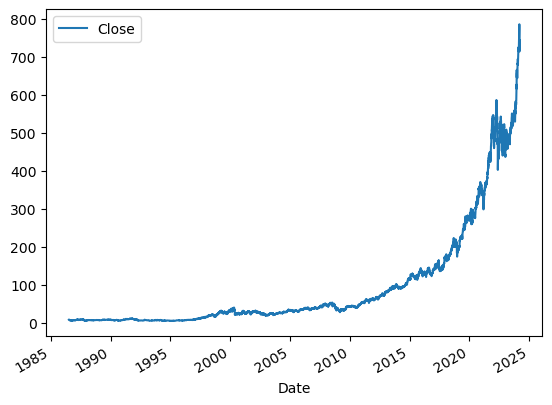

In [7]:
cost.plot.line(y="Close", use_index=True)

In [8]:
# remove columns we don't need
del cost['Dividends']
del cost['Stock Splits']

In [9]:
cost

,Open,High,Low,Close,Volume
Date,,,,,
1986-07-09 00:00:00-04:00,7.208666,7.461601,7.124354,7.419446,1116800
1986-07-10 00:00:00-04:00,7.461606,7.503762,7.208670,7.377294,595600
1986-07-11 00:00:00-04:00,7.335135,7.377291,7.124355,7.124355,800400
1986-07-14 00:00:00-04:00,7.166515,7.166515,6.829268,6.913579,738000
1986-07-15 00:00:00-04:00,6.871418,6.871418,6.281235,6.702794,2059200
...,...,...,...,...,...
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200
2024-03-19 00:00:00-04:00,731.789978,735.349976,730.020020,732.169983,1322700


### Setting Up Our Target For Machiene Learning

In [10]:
# target will be will price go up or down TOMORROW
# predicting absolute price is dangerous 
# on days stock goes UP, can we predict it goes UP
cost['Tomorrow'] = cost['Close'].shift(-1)
cost #shifted closing price a day up 

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1986-07-09 00:00:00-04:00,7.208666,7.461601,7.124354,7.419446,1116800,7.377294
1986-07-10 00:00:00-04:00,7.461606,7.503762,7.208670,7.377294,595600,7.124355
1986-07-11 00:00:00-04:00,7.335135,7.377291,7.124355,7.124355,800400,6.913579
1986-07-14 00:00:00-04:00,7.166515,7.166515,6.829268,6.913579,738000,6.702794
1986-07-15 00:00:00-04:00,6.871418,6.871418,6.281235,6.702794,2059200,6.829262
...,...,...,...,...,...,...
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,731.539978
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,732.169983
2024-03-19 00:00:00-04:00,731.789978,735.349976,730.020020,732.169983,1322700,740.719971


In [11]:
cost['Target'] = (cost['Tomorrow'] > cost['Close']).astype(int) 
#what we are trying to predict

In [12]:
cost

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1986-07-09 00:00:00-04:00,7.208666,7.461601,7.124354,7.419446,1116800,7.377294,0
1986-07-10 00:00:00-04:00,7.461606,7.503762,7.208670,7.377294,595600,7.124355,0
1986-07-11 00:00:00-04:00,7.335135,7.377291,7.124355,7.124355,800400,6.913579,0
1986-07-14 00:00:00-04:00,7.166515,7.166515,6.829268,6.913579,738000,6.702794,0
1986-07-15 00:00:00-04:00,6.871418,6.871418,6.281235,6.702794,2059200,6.829262,1
...,...,...,...,...,...,...,...
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,731.539978,1
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,732.169983,1
2024-03-19 00:00:00-04:00,731.789978,735.349976,730.020020,732.169983,1322700,740.719971,1


In [13]:
# market could've shifted fundamentally, so old data might not be useful
# in making future predictions
cost = cost.loc['1990-01-01':].copy()

In [14]:
cost

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,7.841005,7.841005,7.672381,7.841005,839200,7.967478,1
1990-01-03 00:00:00-05:00,7.883166,8.051790,7.883166,7.967478,658000,8.051790,1
1990-01-04 00:00:00-05:00,7.967478,8.136102,7.967478,8.051790,1148400,8.093943,1
1990-01-05 00:00:00-05:00,8.051787,8.136099,8.009631,8.093943,414400,7.946399,0
1990-01-08 00:00:00-05:00,8.009633,8.093945,7.883165,7.946399,770800,7.883161,0
...,...,...,...,...,...,...,...
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,731.539978,1
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,732.169983,1
2024-03-19 00:00:00-04:00,731.789978,735.349976,730.020020,732.169983,1322700,740.719971,1


### Training an Initial ML Model 

In [15]:
from sklearn.ensemble import RandomForestClassifier 
# train individual decision trees with randomized parameters, averaging results
# resistant to overfit
# pick up non-linearity in data

model = RandomForestClassifier(n_estimators = 200, min_samples_split=100, random_state=1)

train = cost.iloc[:-100]
test = cost.iloc[-100:]

# list of all the columns to use to predict the target
# can't use the 'Tomorrow' or 'Target' columns cause model will know the future
predictors = ['Close', 'Volume', 'Open', 'High', 'Low']
model.fit(train[predictors], train['Target'])

RandomForestClassifier(min_samples_split=100, n_estimators=200, random_state=1)

In [16]:
# measure how accurate the model is
from sklearn.metrics import precision_score 
# when we said the market will go up, 'Target' = 1, did it actually go up?

preds = model.predict(test[predictors])

In [17]:
preds = pd.Series(preds, index=test.index)

In [18]:
precision_score(test['Target'], preds)

0.8571428571428571

In [19]:
# combine actual and predicted values
combined = pd.concat([test["Target"], preds], axis=1)

<Axes: xlabel='Date'>

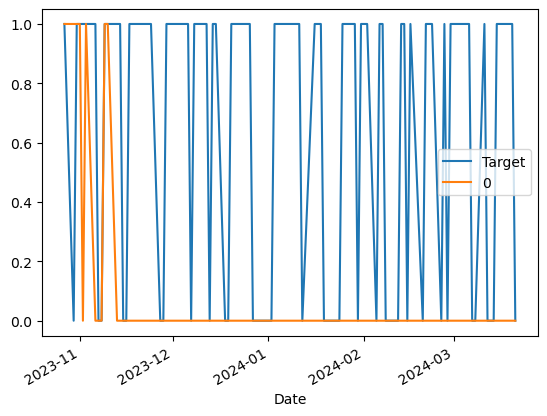

In [20]:
combined.plot()

### Building a Backtesting System

In [21]:
# create a prediction function that wraps
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [22]:
# predicting value of stock from different years
# accuratley measures error over time
def backtest(data, model, predictors, start = 2500, step = 250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()    
        test = data.iloc[1:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [24]:
predictions = backtest(cost, model, predictors)

In [29]:
predictions["Predictions"].value_counts()

Predictions
0    86916
1    56680
Name: count, dtype: int64

#### predicted Costco Stock would go down 86,916 days and up on 56680 days

In [27]:
precision_score(predictions["Target"], predictions["Predictions"])

0.7774347212420607

#### Across the 143596 training days we were about 77% accurate

#### When we said the market would go up or down, it went up or down 77% of the time

In [30]:
# percentage of days where the market actually went up
predictions["Target"].value_counts()/predictions.shape[0]

Target
0    0.519137
1    0.480863
Name: count, dtype: float64

#### For the days we were looking at, the Costco stock went up 52% of days and the stock went down 48% of days

### Adding Additional Predictors to Model

In [48]:
# create a variety of rolling averages
# 2 days, week, 3 months, year, 4 years
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = cost.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    cost[ratio_column] = cost["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    cost[trend_column] = cost.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

/var/folders/ls/fpn_6kqs31d_nf9fhmdmlwqr0000gn/T/ipykernel_48617/388801388.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost[ratio_column] = cost["Close"] / rolling_averages["Close"]
/var/folders/ls/fpn_6kqs31d_nf9fhmdmlwqr0000gn/T/ipykernel_48617/388801388.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cost[trend_column] = cost.shift(1).rolling(horizon).sum()["Target"]
/var/folders/ls/fpn_6kqs31d_nf9fhmdmlwqr0000gn/T/ipykernel_48617/388801388.py:10: SettingWithCopyWarning: 
A value is trying 

In [49]:
cost

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,6.534174,6.618486,6.449862,6.449862,1956600,6.618483,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-15 00:00:00-05:00,6.534171,6.618483,6.449859,6.618483,1354200,6.492018,0,1.012903,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993-12-16 00:00:00-05:00,6.618486,6.618486,6.449862,6.492018,2091400,6.744954,1,0.990354,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1993-12-17 00:00:00-05:00,6.534174,6.829266,6.492018,6.744954,3609200,6.660643,0,1.019108,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1993-12-20 00:00:00-05:00,6.702799,6.744955,6.576331,6.660643,2084200,6.576327,0,0.993711,1.010230,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,738.330017,740.679993,728.989990,731.950012,1826100,725.630005,0,0.998465,1.004689,1.042791,1.286365,1.614281,0.0,1.0,36.0,153.0,551.0
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,731.539978,1,0.995664,0.995995,1.032304,1.272995,1.598700,0.0,1.0,35.0,153.0,551.0
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,732.169983,1,1.004056,0.999317,1.038991,1.281056,1.610085,1.0,2.0,36.0,153.0,551.0


In [50]:
cost = cost.dropna()

In [51]:
cost

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Close_Ratio_5,Close_Ratio_60,Close_Ratio_250,Close_Ratio_1000,Trend_2,Trend_5,Trend_60,Trend_250,Trend_1000
Date,,,,,,,,,,,,,,,,,
1997-11-26 00:00:00-05:00,14.585956,15.155061,14.459488,15.049671,4337800,14.944293,0,1.018545,1.028522,1.143352,1.389762,2.151494,1.0,2.0,29.0,124.0,436.0
1997-11-28 00:00:00-05:00,15.007527,15.133995,14.923215,14.944293,1579400,15.155066,1,0.996487,1.009397,1.131812,1.376462,2.133890,1.0,2.0,28.0,124.0,435.0
1997-12-01 00:00:00-05:00,14.923208,15.176144,14.754584,15.155066,4478200,14.628116,0,1.007003,1.018414,1.143607,1.392124,2.161312,1.0,2.0,29.0,125.0,436.0
1997-12-02 00:00:00-05:00,15.133987,15.197221,14.543804,14.628116,3969200,14.628116,0,0.982307,0.984676,1.100808,1.340335,2.083820,1.0,2.0,28.0,125.0,435.0
1997-12-03 00:00:00-05:00,14.670272,14.838895,14.459492,14.628116,4850400,14.417344,0,1.000000,0.983003,1.097616,1.336988,2.081457,0.0,2.0,28.0,124.0,435.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-14 00:00:00-04:00,738.330017,740.679993,728.989990,731.950012,1826100,725.630005,0,0.998465,1.004689,1.042791,1.286365,1.614281,0.0,1.0,36.0,153.0,551.0
2024-03-15 00:00:00-04:00,732.520020,732.520020,723.219971,725.630005,3389900,731.539978,1,0.995664,0.995995,1.032304,1.272995,1.598700,0.0,1.0,35.0,153.0,551.0
2024-03-18 00:00:00-04:00,726.099976,733.340027,726.020020,731.539978,1595200,732.169983,1,1.004056,0.999317,1.038991,1.281056,1.610085,1.0,2.0,36.0,153.0,551.0


### Improving Model

In [52]:
model = RandomForestClassifier(n_estimators = 300, min_samples_split=50, random_state=1)

In [53]:
# rewrite prediction function
def predict(train, test, predictors, model):
    model.fit(train[predictors], train['Target'])
    preds = model.predict_proba(test[predictors])[:,1] # returns probability of whether row will be 0 or 1
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name='Predictions')
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [54]:
predictions = backtest(cost, model, new_predictors) # using rataios are more informative than absolute 

In [55]:
predictions["Predictions"].value_counts()

Predictions
0.0    66135
1.0    14468
Name: count, dtype: int64

In [56]:
precision_score(predictions["Target"], predictions["Predictions"])

0.979817528338402

#### When the model predicts the stock will go up or down, the model is correct 98% of the time!

In [ ]:
# Exchanges open over night
# Add news -- Macro Economic Conditions (interest rate, inflation)
# Key stocks and sectors that might effect Costco
# Increase Resolution, looking at tick data 